In [1]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
#dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11493376/11490434 [==============================] - 4s 0us/step


Shape of Images:  (60000, 28, 28)
Shape of Labels: (60000,)


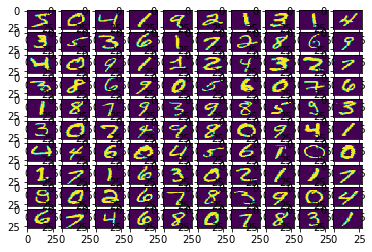

In [4]:
#visualization
print("Shape of Images: ", x_train.shape)
print("Shape of Labels:" , y_train.shape)

fig,ax = plt.subplots(10,10) 
k = 0
for i in range(10): 
    for j in range(10): 
        ax[i][j].imshow(x_train[k], aspect='auto') 
        k += 1
plt.show()

In [5]:
#Hyperparameters
learning_rate = 0.01
training_epochs = 10
batch_size = 32
display_step = 1

n_hidden_1 = 128
n_hidden_2 = 32
n_input = 784
n_output = 10

In [6]:
#Formating the dataset

def to_onehot(y):
    data = np.zeros((n_output))
    data[y] = 1
    return data

x_train = np.reshape(x_train, (-1, n_input))
x_test = np.reshape(x_test, (-1, n_input))

y_train = np.array([to_onehot(y) for y in y_train])
y_test = np.array([to_onehot(y) for y in y_test])

In [8]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
#Model inputs
X = tf.placeholder("float", [None, n_input])
Y = tf.placeholder("float", [None, n_output])

Instructions for updating:
non-resource variables are not supported in the long term


In [9]:
# Weight
W1 = tf.Variable(tf.random_uniform([n_input, n_hidden_1], -1.0, 1.0))
W2 = tf.Variable(tf.random_uniform([n_hidden_1, n_hidden_2], -1.0, 1.0))
W3 = tf.Variable(tf.random_uniform([n_hidden_2, n_output], -1.0, 1.0))

# Bias
b1 = tf.Variable(tf.zeros([n_hidden_1]))
b2 = tf.Variable(tf.zeros([n_hidden_2]))
b3 = tf.Variable(tf.zeros([n_output]))

In [10]:
# Create model
def multilayer_perceptron(x):
    l0 = x
    l1 = tf.nn.sigmoid(tf.matmul(l0, W1) + b1)
    l2 = tf.nn.sigmoid(tf.matmul(l1, W2) + b2)
    l3 = tf.matmul(l2, W3) + b3
    return l3

In [11]:
logits = multilayer_perceptron(X)
pred = tf.nn.softmax(logits)

In [12]:
#loss and optimization
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)

# Initializing the variables
init = tf.global_variables_initializer()

In [13]:
#Accuracy definition
def accuracy(predictions, labels): 
    correctly_predicted = np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1)) 
    acc = (100.0 * correctly_predicted) / predictions.shape[0] 
    return acc

In [ ]:
#Model Training

with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.0
        avg_acc = 0.0
        total_batch = len(x_train)//batch_size
        
        for i in range(total_batch):
            batch_x = x_train[i:i+1*batch_size]
            batch_y = y_train[i:i+1*batch_size]
            
            _, c = sess.run([train_op, loss_op], feed_dict={X: batch_x, Y: batch_y})
            avg_cost += c/total_batch
            
            pred_y = sess.run(logits, feed_dict={X: batch_x})
            acc = accuracy(pred_y, batch_y)
            avg_acc += acc/total_batch
            
            
        if (epoch+1) % display_step == 0:
            test_loss = sess.run(loss_op, feed_dict={X: x_test, Y: y_test})
            pred_y = sess.run(pred, feed_dict={X: x_test})
            test_acc = accuracy(pred_y, y_test)
            
            print("Epoch: {:2.0f} - Loss: {:1.5f} - Acc: {:2.5f} - Test Loss: {:1.5f} - Test Acc: {:2.5f}".format(
                epoch+1, avg_cost, avg_acc, test_loss, test_acc))
            
    print("Optimization Finshed")
    
    # Test model
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(Y, 1))
    acc = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print("Test Accuracy:", acc.eval({X: x_test, Y: y_test}))